#### Pertanyaan saya adalah apakah wilayah dengan total kasus terbanyak juga memiliki total kasus kategori mayor peringkat pertama yang sama dengan total kasus kategori mayor terhadap semua wilayah?

# Import Package yang Diperlukan

In [23]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import folium

# Pemanggilan Data

In [24]:
df = pd.read_csv('london_crime_by_lsoa.csv')
df.head(5)

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


# Preprocessing Data (Cleaning Bila Diperlukan)

### Melihat Daftar Kolom

In [39]:
df.columns.values

array(['borough', 'major_category', 'minor_category', 'value', 'year',
       'month'], dtype=object)

### Melihat Informasi Dataframe

In [25]:
df.info()
# Pada kolom value, year, dan month sudah sesuai dalam integer semuanya

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


### Menjumlahkan Kolom yang Kosong

In [26]:
df.isnull().sum()
# Berdasarkan hasil ini dapat disimpulkan tidak ada data yang kosong

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

### Mengubah Index ke Kolom lsoa_code

In [28]:
df.set_index('lsoa_code', inplace=True)

### Menampilkan Dataframe 5 Baris Teratas

In [29]:
df.head(5)

,borough,major_category,minor_category,value,year,month
lsoa_code,,,,,,
E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


# Line Plot

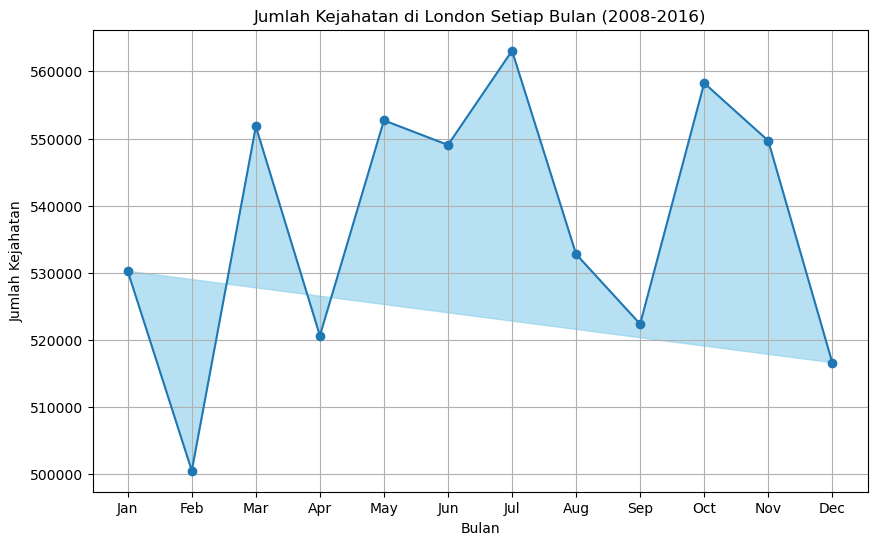

In [30]:
crime_counts = df.groupby('month')['value'].sum()
plt.figure(figsize=(10, 6))
plt.fill(crime_counts.index, crime_counts.values, color='skyblue', alpha=0.6)
plt.plot(crime_counts.index, crime_counts.values, marker='o')
plt.title('Jumlah Kejahatan di London Setiap Bulan (2008-2016)')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Kejahatan')
plt.grid(True)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

# Area Plot

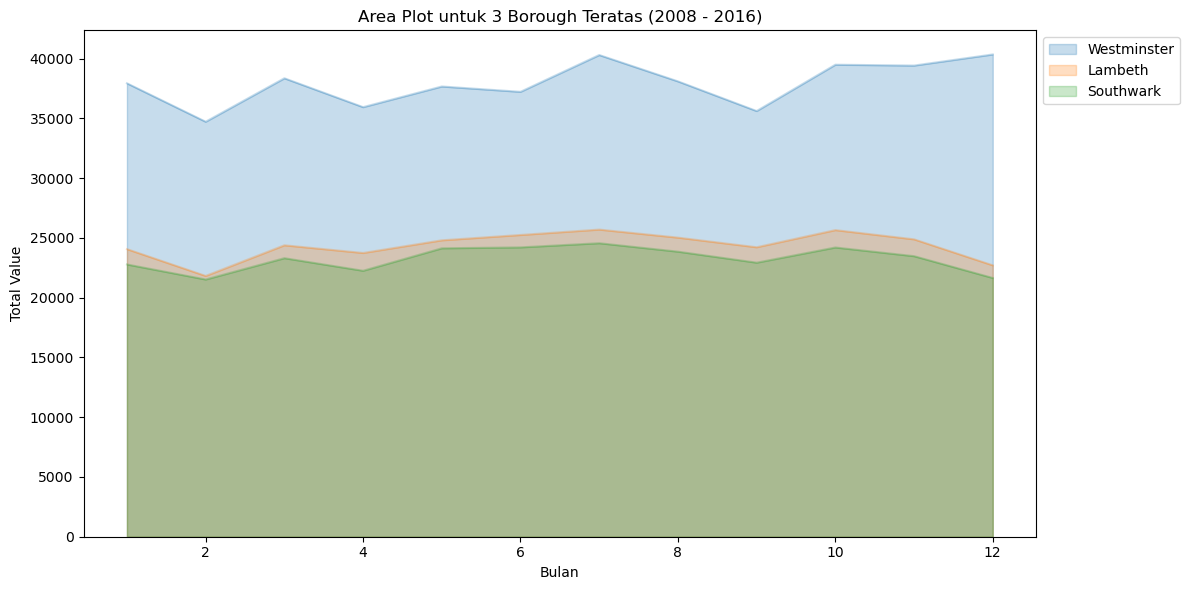

In [31]:
crime_counts = df.groupby(['borough', 'month'])['value'].sum().reset_index()
crime_pivot = crime_counts.pivot_table(index='borough', columns='month', values='value', fill_value=0)

top_3_boroughs = crime_pivot.sum(axis=1).sort_values(ascending=False).head(3)
top_boroughs = top_3_boroughs.index
data_top_boroughs = crime_pivot.loc[top_boroughs]

data_top_boroughs.T.plot(kind='area', alpha=0.25, stacked=False, figsize=(12, 6))
plt.xlabel('Bulan')
plt.ylabel('Total Value')
plt.title('Area Plot untuk 3 Borough Teratas (2008 - 2016)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

#### Berdasarkan area plot di atas dapat ditarik kesimpulan bahwa 3 wilayah teratas dengan kejahatan tertinggi itu adalah Westminster, Lambeth, dan Soulwark. Wilayah Westminster menemplati peringkat pertama yang totalnya terpaut jauh dibandingkan peringkat 2 dan 3

# Histogram

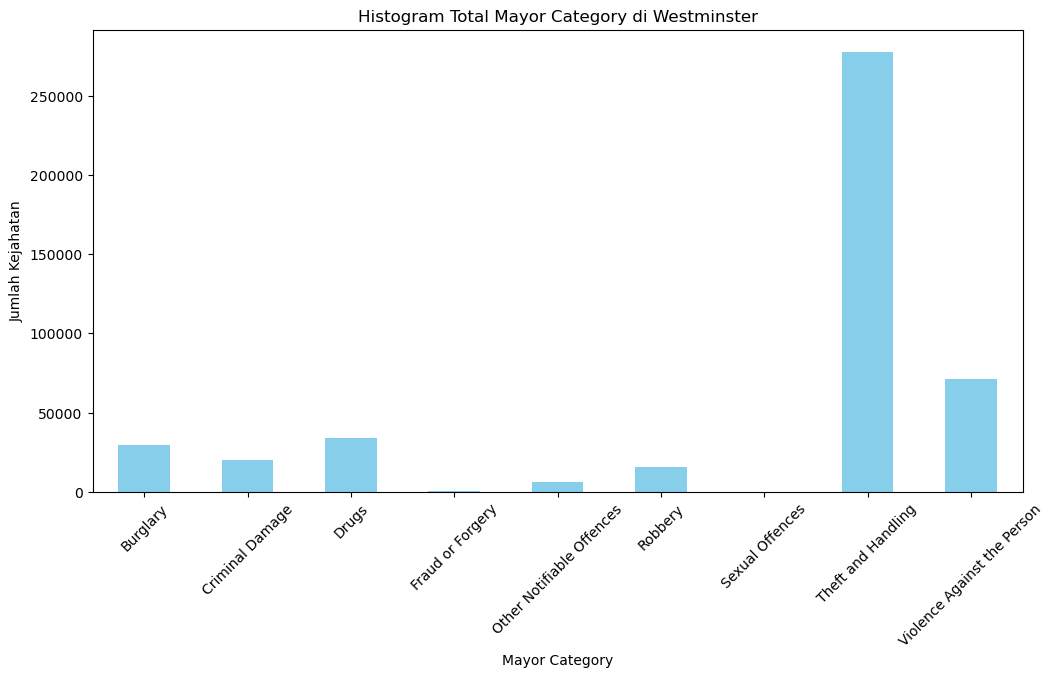

In [32]:
westminster_data = df[df['borough'] == 'Westminster']
crime_counts = westminster_data.groupby('major_category')['value'].sum()

plt.figure(figsize=(12, 6))
crime_counts.plot(kind='bar', color='skyblue')
plt.title('Histogram Total Mayor Category di Westminster')
plt.xlabel('Mayor Category')
plt.ylabel('Jumlah Kejahatan')
plt.xticks(rotation=45)  # Mengatur label sumbu x agar mudah dibaca
plt.show()

#### Berdasarkan histogram di atas dapat dilihat bahwa peringkat pertama mayor category berdasarkan wilayah dengan total kejahatan terbanyak itu pada kategory Thieft and Handling

# Bar Chart

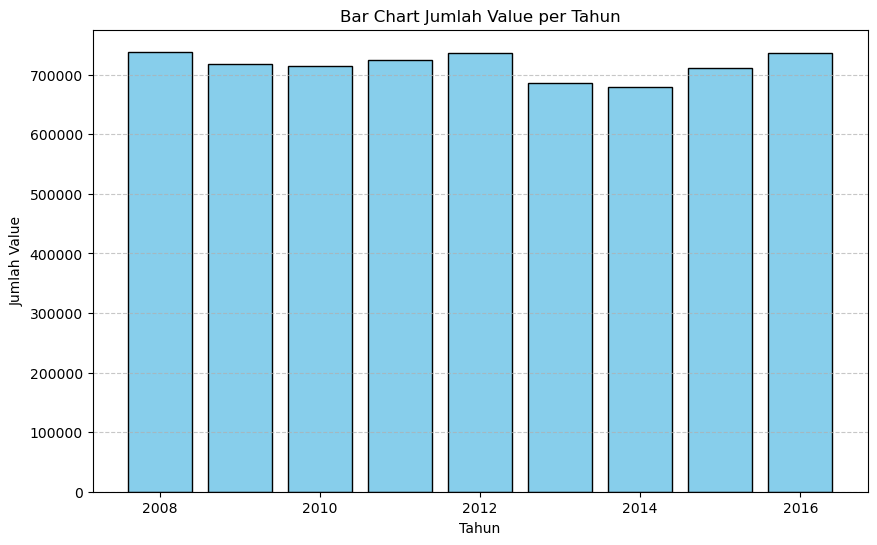

In [33]:
yearly_counts = df.groupby('year')['value'].sum()

plt.figure(figsize=(10, 6))
plt.bar(yearly_counts.index, yearly_counts.values, color='skyblue', edgecolor='k')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Value')
plt.title('Bar Chart Jumlah Value per Tahun')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Berdasarkan bar chart di atas dapat dilihat bahwa jumlah total kejatahan dalam rentang 2008-2016. Jumlahnya setiap tahun cenderung stabil, tapi ada perubahan yang cukup mencolok pada tahun 2012 ke tahun 2013. Terjadi penurunan, tetapi setelahnya meningkat kembali secara perlahan ke total yang sama di tahun 2012

# Pie Chart

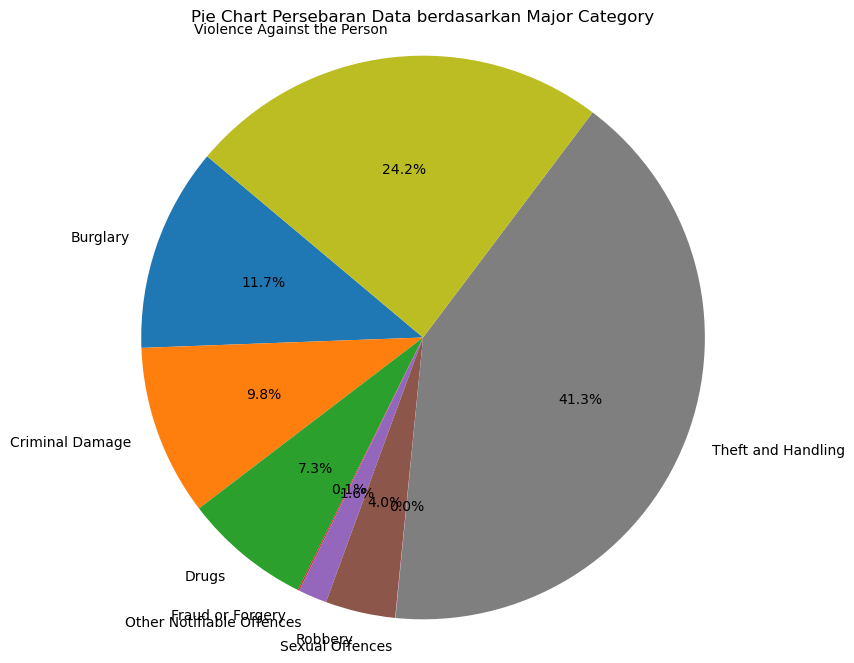

In [34]:
category_counts = df.groupby('major_category')['value'].sum()

plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart Persebaran Data berdasarkan Major Category')
plt.axis('equal')  # Untuk membuat lingkaran menjadi bentuk lingkaran sempurna
plt.show()

#### Berdasarkan pie chart di atas dapat dilihat bahwa Thieft and Handling adalah sebaran total kejahatan yang paling banyak, yaitu sebesar 41,3% dari seluruh kasus. Selaras dengan yang terjadi di Wesminster, yaitu kejahatan yang paling banyak disumbang oleh Thieft and Handling

# Box Plot

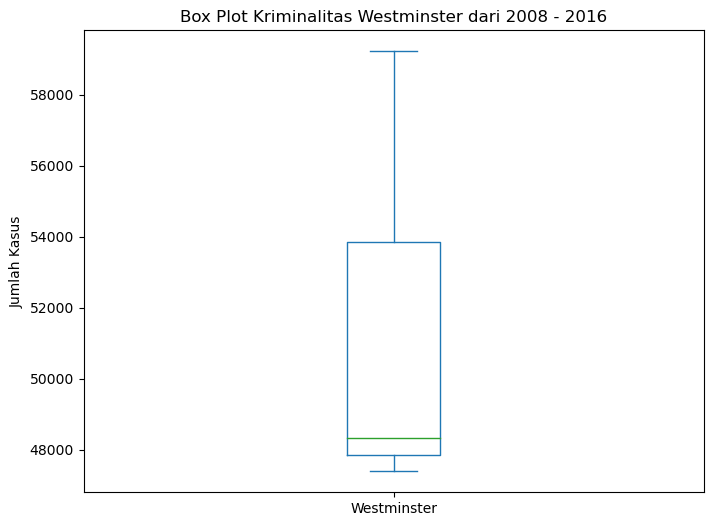

In [35]:
westminster_data = df[df['borough'] == 'Westminster']
westminster_yearly_total = westminster_data.groupby('year')['value'].sum()
westminster_df = pd.DataFrame({'Westminster': westminster_yearly_total})
westminster_df['borough'] = westminster_yearly_total.index
westminster_df.reset_index(drop=True, inplace=True)
westminster_df.set_index('borough', inplace=True)
westminster_df.plot(kind='box', figsize=(8,6))

plt.title('Box Plot Kriminalitas Westminster dari 2008 - 2016')
plt.ylabel('Jumlah Kasus')
plt.show()

#### Berdasarkan box plot di atas dapat dilihat bahwa Westsminster pernah mencapai total kasus 59000 an. Paling sering di antara 48000an hingga 54000an

# Scatter Plot

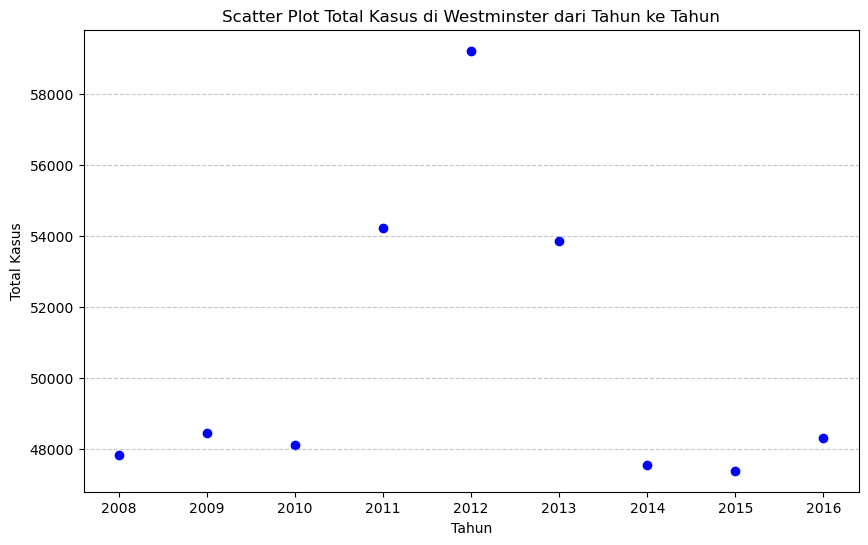

In [36]:
westminster_data = df[df['borough'] == 'Westminster']
westminster_yearly_total = westminster_data.groupby('year')['value'].sum()

plt.figure(figsize=(10, 6))
plt.scatter(westminster_yearly_total.index, westminster_yearly_total.values, marker='o', color='blue')
plt.xlabel('Tahun')
plt.ylabel('Total Kasus')
plt.title('Scatter Plot Total Kasus di Westminster dari Tahun ke Tahun')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Berdasarkan scatter plot di atas terlihat bahwa terdapat lonjakan kejadian kasus pada tahun 2012. Hal ini pasti ada penyebabnya karena dapat dilihat angkanya terjadi penurunan lagi pada tahun 2013

# Word Clouds

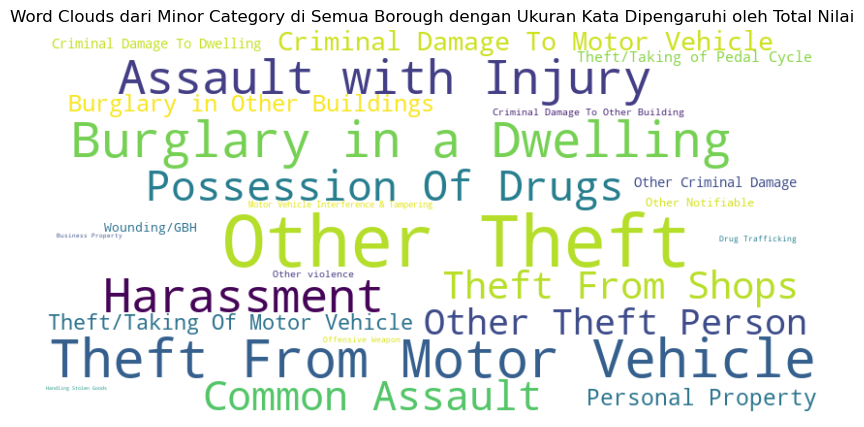

In [37]:
data_for_wordcloud = df[['minor_category', 'value']]
minor_category_counts = data_for_wordcloud.groupby('minor_category')['value'].sum().reset_index()

wordcloud_data = {row['minor_category']: row['value'] for index, row in minor_category_counts.iterrows()}
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(wordcloud_data)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Clouds dari Minor Category di Semua Borough dengan Ukuran Kata Dipengaruhi oleh Total Nilai')
plt.show()

#### Gambar di atas adalah hasil word clouds terhadap minor kategory yang paling sering terjadi, semakin besar jumlahnya, maka semakin besar juga katanya

# Folium Maps

In [38]:
london_map = folium.Map(location=[51.5074, -0.1278], zoom_start=10)

borough_coordinates = {
    'Barking and Dagenham': [51.5416, 0.133],
    'Barnet': [51.6252, -0.1517],
    'Bexley': [51.4549, 0.1505],
    'Brent': [51.5588, -0.2817],
    'Bromley': [51.4039, 0.0198],
    'Camden': [51.5290, -0.1255],
    'Croydon': [51.3714, -0.0977],
}
for borough, coordinates in borough_coordinates.items():
    folium.Marker(
        location=coordinates,
        popup=borough,
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(london_map)

london_map

#### Di atas adalah gambar folium map dari Kota London

#### Berdasarkan semua visualisasi yang ada dapat dilihat bahwa 3 wilayah dengan kasus tertinggi adalah Westminster, Lambeth, dan Soulwark. Westminster kasusnya dominan dengan Thief dan Handling. Kita lihat berdasarkan datawilayah keseluruhan itu kasus yang paling banyak ada pada mayor kategori Thief dan Handling juga.